In [12]:
from IPython.display import Image, display
import cv2

def img_show(image, width=400):
    _, buffer = cv2.imencode('dogs_.jpg', image)
    display(Image(data=buffer, width=width))

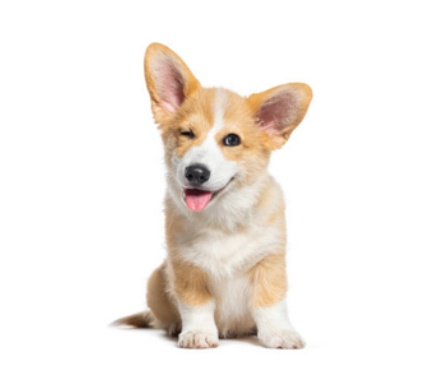

In [13]:
import mediapipe as mp

image1 = mp.Image.create_from_file('dogs_.png')
image = image1.numpy_view()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_show(image)

In [14]:
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

base_options = python.BaseOptions(model_asset_path='../models/effi.tflite')
options = vision.ImageClassifierOptions(base_options=base_options, max_results=4)
classifier = vision.ImageClassifier.create_from_options(options)


I0000 00:00:1765847463.412181    9049 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1765847463.416658    9645 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.0.7-0ubuntu0.24.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
W0000 00:00:1765847463.433417    9648 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [15]:
classification_result = classifier.classify(image1)
classification_result

ClassificationResult(classifications=[Classifications(categories=[Category(index=263, score=0.859375, display_name='', category_name='Pembroke'), Category(index=264, score=0.09375, display_name='', category_name='Cardigan'), Category(index=151, score=0.01953125, display_name='', category_name='Chihuahua'), Category(index=273, score=0.00390625, display_name='', category_name='dingo')], head_index=0, head_name='probability')], timestamp_ms=0)

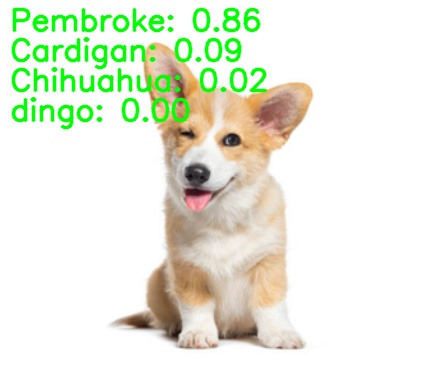

In [16]:
for idx, category in enumerate(classification_result.classifications[0].categories):
    text = f"{category.category_name}: {category.score:.2f}"
    position = (10, 30 + idx * 30)
    cv2.putText(image, text, position, cv2.FONT_HERSHEY_SIMPLEX,
                1, (0, 255, 0), 2, cv2.LINE_AA)

img_show(image)